Goal: time series binned analysis to check how open access trends have changed over the years.

We need to get a .yml file for quick setup

In [1]:
library(tidyverse)
library(plotly)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(plotly): there is no package called ‘plotly’


In [31]:
df <- read_csv('../Data/PMID_PMC_Journal_Year.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  pmid = col_integer(),
  pmd = col_character(),
  journal = col_character(),
  date = col_character()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“8 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual    file                        expected   <int> <chr> <chr>      <chr>     <chr>                       actual 1  5128 pmid  an integer NBK333494 'PMID_PMC_Journal_Year.csv' file 2  5611 pmid  an integer NBK321108 'PMID_PMC_Journal_Year.csv' row 3  5928 pmid  an integer NBK310335 'PMID_PMC_Journal_Year.csv' col 4  7492 pmid  an integer NBK232825 'PMID_PMC_Journal_Year.csv' expected 5  7580 pmid  an integer NBK223859 'PMID_PMC_Journal_Year.csv'
... ................. ... .............................................................. ........ ............

In [32]:
head(df)

X1,pmid,pmd,journal,date
0,30165703,NA,J Infect Dis,2018 Aug 24
1,30165548,NA,J Infect Dis,2018 Aug 27
2,30165370,NA,PLoS One,2018 Aug 30
3,30161172,NA,PLoS One,2018 Aug 30
4,30161101,NA,MMWR Morb Mortal Wkly Rep,2018 Aug 31
5,30158702,NA,Nature,2018 Aug 29


In [33]:
df <- df[-1]

In [34]:
head(df)

pmid,pmd,journal,date
30165703,NA,J Infect Dis,2018 Aug 24
30165548,NA,J Infect Dis,2018 Aug 27
30165370,NA,PLoS One,2018 Aug 30
30161172,NA,PLoS One,2018 Aug 30
30161101,NA,MMWR Morb Mortal Wkly Rep,2018 Aug 31
30158702,NA,Nature,2018 Aug 29


In [35]:
glimpse(df)

Observations: 25,256
Variables: 4
$ pmid    <int> 30165703, 30165548, 30165370, 30161172, 30161101, 30158702,...
$ pmd     <chr> NA, NA, NA, NA, NA, NA, NA, "PMC6114501", "PMC6114840", NA,...
$ journal <chr> "J Infect Dis", "J Infect Dis", "PLoS One", "PLoS One", "MM...
$ date    <chr> "2018 Aug 24", "2018 Aug 27", "2018 Aug 30", "2018 Aug 30",...


In [36]:
df$year <- ymd(df$date) 
df$year <- arrange(df, date)
df$journal <- factor(df$journal)

Warning message:
“ 6062 failed to parse.”

In [37]:
str(df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	25256 obs. of  5 variables:
 $ pmid   : int  30165703 30165548 30165370 30161172 30161101 30158702 30158473 30157877 30157796 30157702 ...
 $ pmd    : chr  NA NA NA NA ...
 $ journal: Factor w/ 1895 levels "1007/s00125-016-4062-9",..: 1164 1164 1643 1643 1437 1489 1796 1695 320 937 ...
 $ date   : chr  "2018 Aug 24" "2018 Aug 27" "2018 Aug 30" "2018 Aug 30" ...
 $ year   :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	25256 obs. of  5 variables:
  ..$ pmid   : int  11017887 11401759 15663854 18826815 29045429 20049994 18939703 16629320 27449128 27510397 ...
  ..$ pmd    : chr  "10" "10" "10" "10" ...
  ..$ journal: chr  "1289/ehp" "1289/ehp" "3201/eid1012" "3201/eid1410" ...
  ..$ date   : chr  "00108833" "01109481" "040486" "070781" ...
  ..$ year   : Date, format: NA NA ...


In [38]:
# count the number of missing values in the column pmd
# This means from the paper could not be downloaded: How many fall in this category

sum(is.na(df$pmd)) 

[1] 18551

18551 papers could not be downloaded. If we subtract from the numbers of rows we have 25,256 - 18551 you get 6705 publications remain.

In [47]:
# counting the number of publications per journal since the 1970's
# This dataset needs additional cleaning to ensure each row is in the right place
sort(table(df$journal),decreasing = TRUE)


                                             PLoS One 
                                                  911 
                                              Malar J 
                                                  334 
                          J Acquir Immune Defic Syndr 
                                                  192 
                                    Am J Trop Med Hyg 
                                                  186 
                                   PLoS Negl Trop Dis 
                                                  179 
                                    BMC Public Health 
                                                  177 
                                                 AIDS 
                                                  166 
                                        Pan Afr Med J 
                                                  157 
                                         J Infect Dis 
                                                  149 
         

In [40]:
# draw a plot to show trend of open access trends through the years
# the data is a lot we could combine groupby and count to remedy the situation

yearly_count_df <- df %>% group_by(date, pmd) %>% summarize(n_pmd = n())

head(yearly_count_df)

date,pmd,n_pmd
00108833,10,1
01109481,10,1
040486,10,1
070781,10,1
07992a87522e1f229c7cb023270a2af1,PMC5646754,1
1,10,3


In [41]:
tail(yearly_count_df)

date,pmd,n_pmd
NA,UKMS4587,1
NA,UKMS47938,1
NA,UKMS47939,1
NA,UKMS4829,1
NA,UKMS4852,1
NA,NA,12274


In [42]:
names(yearly_count_df)

[1] "date"  "pmd"   "n_pmd"

In [43]:
str(yearly_count_df)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	8765 obs. of  3 variables:
 $ date : chr  "00108833" "01109481" "040486" "070781" ...
 $ pmd  : chr  "10" "10" "10" "10" ...
 $ n_pmd: int  1 1 1 1 1 3 1 1 1 1 ...
 - attr(*, "vars")= chr "date"
 - attr(*, "drop")= logi TRUE


In [52]:
yearly_count_df2 <- yearly_count_df[1:150,]
head(yearly_count_df2)

date,pmd,n_pmd
00108833,10,1
01109481,10,1
040486,10,1
070781,10,1
07992a87522e1f229c7cb023270a2af1,PMC5646754,1
1,10,3


Warning message:
“ 141 failed to parse.”Warning message:
“ 141 failed to parse.”Warning message:
“Removed 141 rows containing missing values (geom_point).”

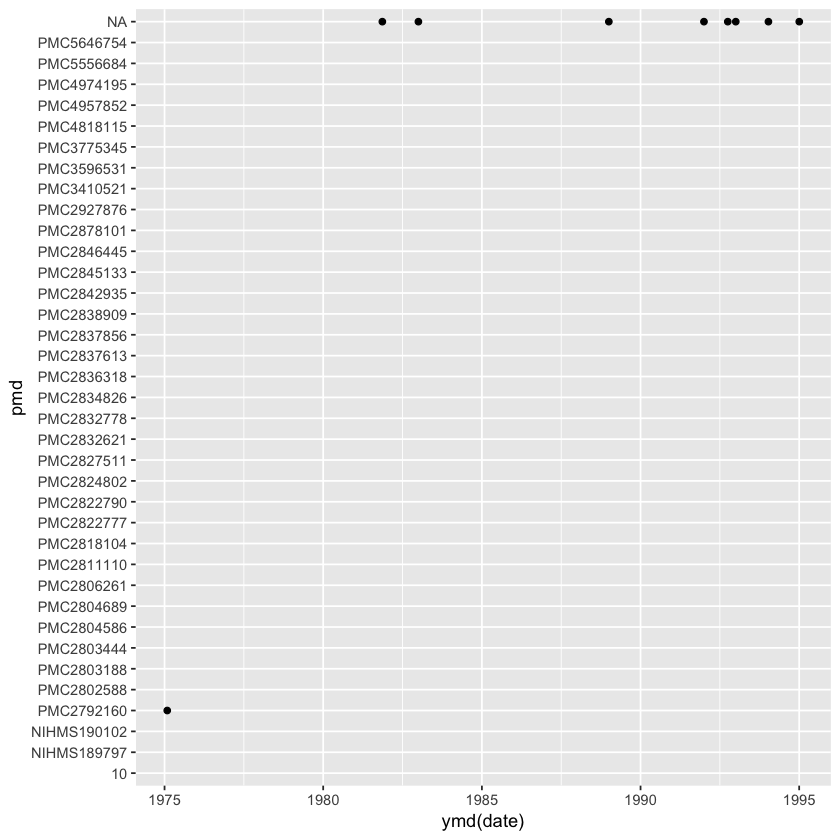

In [53]:
p <- ggplot(yearly_count_df2, aes(ymd(date), pmd)) + geom_point() 

p